In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from models import DecisionTreeClassifier
from models import KNN
from statistics import mode
from sklearn.decomposition import PCA
from SVM import SVM


# import this function from the models.py
from sklearn.metrics import accuracy_score

In [2]:
df  = pd.read_csv("cleaned_dataset.csv")
data = df.drop(["id","class"],axis=1)
target = df["class"]
X_train, X_test, y_train, y_test = train_test_split(data,target, train_size = 0.3, random_state=42)

Decision Tree Classifier

In [3]:
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train, y_train)
y_pred_dt = model_dt.predict(X_test)
print("The accuracy of Decision Tree Classifier:",accuracy_score(y_test,y_pred_dt))

The accuracy of Decision Tree Classifier: 0.879591836735


k-NN Classifier

In [4]:
knnobj = KNN(X_train.values.tolist(), y_train.values.tolist(), X_test.values.tolist(), y_test.values.tolist())
print("The accuracy of KNN classifier is ",knnobj.knn_classifier())

The accuracy of KNN classifier is  96.3265306122449


SVM Classifier

In [5]:
dpsdf1 = pd.read_csv("cleaned_dataset.csv")
dpsdf1 = dpsdf1.drop("id",1)
dpsdf1data = dpsdf1[dpsdf1.columns[:-1]]
dpsdf1class = dpsdf1[dpsdf1.columns[-1]]

pca = PCA(n_components=2, whiten=True).fit(dpsdf1data)
dpsdf1data = pca.transform(dpsdf1data)
print('Preserved Variance: ', sum(pca.explained_variance_ratio_))

npdpsdf1data = np.array(dpsdf1data)
adddatabias = np.zeros((int(npdpsdf1data.shape[0]),1))
adddatabias.fill(-1)
npdpsdf1data = (np.append(npdpsdf1data, adddatabias, axis=1))
npdpsdf1class = np.array(dpsdf1class)
flag = 0

if(flag == 0):
    npdpsdf1class[npdpsdf1class < 3] = -1
    npdpsdf1class[npdpsdf1class > 3] = 1
    flag = 1

dpsdata_train, dpsdata_test, dpsclass_train, dpsclass_test = train_test_split(npdpsdf1data, npdpsdf1class, test_size= .4,random_state=0)


svmobj = SVM()
weights = svmobj.train(dpsdata_train, dpsclass_train, epochs=50)

predicted = svmobj.predict(dpsdata_test, weights)

svmaccuracy = svmobj.accuracy(dpsclass_test, predicted)
print("The accuracy of KNN classifier is ",svmaccuracy)

# svmobj.computeconfusionmat(predicted, dpsclass_test)

# svmobj.printparams()

# svmobj.KFOLDaccuracy(2, npdpsdf1data, npdpsdf1class)

# svmobj.plothyperplane(dpsdata_test, dpsclass_test, weights=weights)



Preserved Variance:  0.762383140213
The accuracy of KNN classifier is  94.2857142857


In [8]:
# y_pred_all = []
# for i in range(len(y_test)):
#     y_pred_all.append(
#         mode([
#               y_pred_dt[i],
#               y_pred_knn[i],
#               y_pred_svm[i]
#         ])
#     )

K-fold cross validiation

In [6]:
kf = KFold(n_splits=6,shuffle=True)
kf.get_n_splits(data)


accuracy_all = {
    'Decision_Tree':[],
    'k-NN': [],
    # 'SVM':[]
}
for train_index, test_index in kf.split(data):
    X_train, X_test = data.iloc[train_index], data.iloc[test_index]
    y_train, y_test = target.iloc[train_index], target.iloc[test_index]

    model_dt = DecisionTreeClassifier()
    model_dt.fit(X_train, y_train)
    y_pred_dt = model_dt.predict(X_test)
    y_acc_dt = accuracy_score(y_test,y_pred_dt)
    accuracy_all['Decision_Tree'].append(y_acc_dt*100)

    # model_knn
    knnobj = KNN(X_train.values.tolist(), y_train.values.tolist(), X_test.values.tolist(), y_test.values.tolist())
    y_acc_knn = knnobj.knn_classifier()
    y_pred_knn = knnobj.y_pred
    accuracy_all['k-NN'].append(y_acc_knn)

    # model_svm = 
    # model_svm.fit(X_train, y_train)
    # y_pred_svm = model_svm.predict(X_test)
    # y_acc_svm = accuracy_score(y_test,y_pred_svm)
    # accuracy_all['SVM'].append(y_acc_svm)

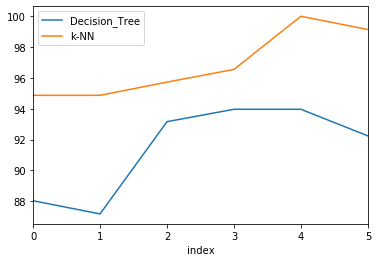

In [7]:
df_temp = pd.DataFrame(accuracy_all)
df_temp = df_temp.reset_index()
df_temp.plot(x='index', y=['Decision_Tree','k-NN'])